<a href="https://colab.research.google.com/github/Bar-Elias/DataStructured_eShop/blob/master/BigMart_DataScience_Project_Bar_Elias.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div dir=rtl>

# יבוא ספריות וקליטת סט הנתונים

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
import numpy as np
from sklearn.model_selection import train_test_split
import random
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LinearRegression, Lasso
from sklearn import metrics

import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import files
data = files.upload()
data = pd.read_csv('data_bigmart.csv')

Saving data_bigmart.csv to data_bigmart.csv


<div dir=rtl>

# אקספלורציה של הנתונים

In [ ]:
print(data.info())
print("\n\n Describe:\n\n",data.describe())
print("\n\n Sample: \n\n", data.sample(5))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB
None


 Describe:

        Item_Weight  Item_

<div dir=rtl>
בסיס האקפלורציה: <br>
<br>
info - לקבל מידע לגבי סוג הערכים, איזה ערכים אלפא-נומריים מסוג object אותם נצטרך לקודד בהמשך.
<br>
describe - סקירה כללית של המאפיינים,ממוצע, סכימה של כולם, סטיית תקן של כל אחד מהמאפיינים הקטגוריאלים והתפלגות כללית.
<br>
sample - דגימה רנדומלית של 5 ערכים כדי לראות פחות או יותר על מה אנחנו מדברים.

In [ ]:
print("Total Nulls values in every column:\n{0} \n\n\n\n" .format(data.isna().sum()))

for col in range(0,11):
    zeros=0
    for i in range(0,len(data)):
        if data.iloc[i,col]==0:
            zeros+=1
    percents = (zeros/len(data))*100
    print("'{0}' feature zeros precentage: {1:.2f} %" .format(data.columns[col],percents))

Total Nulls values in every column:
Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64 




'Item_Identifier' feature zeros precentage: 0.00 %
'Item_Weight' feature zeros precentage: 0.00 %
'Item_Fat_Content' feature zeros precentage: 0.00 %
'Item_Visibility' feature zeros precentage: 6.17 %
'Item_Type' feature zeros precentage: 0.00 %
'Item_MRP' feature zeros precentage: 0.00 %
'Outlet_Identifier' feature zeros precentage: 0.00 %
'Outlet_Establishment_Year' feature zeros precentage: 0.00 %
'Outlet_Size' feature zeros precentage: 0.00 %
'Outlet_Location_Type' feature zeros precentage: 0.00 %
'Outlet_Type' feature zeros pre

<div dir=rtl>
כאן נבדוק את כמות הערכים החסרים בכל אחת מהקטגוריות. אם מדובר בכמות ערכים גדולה (כמו שקיבלנו) נצטרך לטפל בערכים מבלי להסיר אותם.
<br> <br>
בנוסף לכך נבדוק את אחוז האפסים בכל קטגוריה. ניתן לראות שיש 6.17% אפסים בויזואליות של המוצר בחנות. מה שיכול להוות בעיה, כיוון שראינו בדגימה שגם מוצרים שלא נראים לעין יש רווח סופי.

In [ ]:
data['Item_Visibility'].sample(10)

7850    0.019918
6025    0.142733
7990    0.041971
5653    0.025755
3104    0.050809
7225    0.098604
6000    0.021273
4428    0.026074
2900    0.104488
4991    0.018905
Name: Item_Visibility, dtype: float64

<div dir=rtl>
ניתן לראות כי יש אפסים בעמודת הנראות של המוצר. <br> לדעתנו לא הגיוני שמוצר לא יהיה נראה לעין ובכל זאת ימכר לכן בהמשך נטפל בעמודה זו.

In [ ]:
C_s=0; C_m=0; C_h=0; C_N=0
for i in range(0,len(data)):
    if data.iloc[i,8]=='Small':
      C_s+=1 
    elif data.iloc[i,8]=='Medium':
      C_m+=1
    elif data.iloc[i,8]=='High':
      C_h+=1
    else:
      C_N+=1
print("Small value counter={0}, Medium value counter={1}, High value counter={2}, Nulls={3}".format(C_s,C_m,C_h,C_N))


Small value counter=2388, Medium value counter=2793, High value counter=932, Nulls=2410


<div dir=rtl>
כאן אנו עורכים בדיקה על עמודת הגודל החנות (outlet_size).<br>
נרצה לבחון את כמות הערכים החסרים ביחס לערכים הלא חסרים כדי לדעת כיצד לטפל בערכים החסרים בעמודה זו בהמשך.

In [ ]:
print(data.Item_Type.unique())
print(data.Item_Fat_Content.unique())
print(data.Outlet_Identifier.unique())
print(data.Outlet_Location_Type.unique())

['Dairy' 'Soft Drinks' 'Meat' 'Fruits and Vegetables' 'Household'
 'Baking Goods' 'Snack Foods' 'Frozen Foods' 'Breakfast'
 'Health and Hygiene' 'Hard Drinks' 'Canned' 'Breads' 'Starchy Foods'
 'Others' 'Seafood']
['Low Fat' 'Regular' 'low fat' 'LF' 'reg']
['OUT049' 'OUT018' 'OUT010' 'OUT013' 'OUT027' 'OUT045' 'OUT017' 'OUT046'
 'OUT035' 'OUT019']
['Tier 1' 'Tier 3' 'Tier 2']


<div dir=rtl>
כאן רצינו לקבל מידע על כמות הערכים השונים מסוג אלפא נומריים וראינו שקיימת בעיה באחד מהמאפיינים. <br><br>
ניתן לראות שחלק מהערכים בItem_Fat_Content כתובים לא נכון <br>
צריכים להיות רק שני סוגים שונים של ערכים ודרך הפקודה Unique גילינו חמישה. <br>
לכן בהמשך נתקן את הערכים באופן הבא: <br> <br>

LF, low fat  ---> Low Fat<br>
reg          ---> Regular

<div dir=rtl>

# תיקון ערכים בעייתים ומילוי ערכים חסרים

In [ ]:
df=data.copy()

df.Item_Weight.fillna(df.Item_Weight.mean(),inplace=True)


<div dir=rtl>

טיפול בערכים החסרים של עמודת משקל מוצר, באמצעות שיטת המומצע מכיוון שמשקל מוצר הינו ערך רציף והבחנו שלא קיימים מקרי קיצון חריגים מידי.

In [ ]:

df.Outlet_Size.fillna(df.Outlet_Size.mode()[0],inplace=True)

<div dir=rtl>

בעמודה זו אין ערכים מספריים. החלטנו למלא את הערכים החסרים בערך השכיח. <br>
בחרנו בשיטה זו מכיוון שיטת מחיקת שורות הייתה מורידה לנו כרבע מסט הנתונים מה שהיה פוגע במהימנות המודלים.<br>
בנוסף לכך, שיטה נוספת שבחנו הייתה מילוי ערכים באמצעות random choice, שיטה זו גם לא מתאימה מכיוון שקיימות בסה"כ 10 חנויות ברשת וכל חנות בעלת גודל מסוים.

In [ ]:
df.iloc[:,2]=df.iloc[:,2].replace(['LF','low fat'],'Low Fat')
df.iloc[:,2]=df.iloc[:,2].replace('reg','Regular')
df.iloc[:,9]=df.iloc[:,9].replace('Tier 1',1)
df.iloc[:,9]=df.iloc[:,9].replace('Tier 2',2)
df.iloc[:,9]=df.iloc[:,9].replace('Tier 3',3)
print(df.Item_Type.unique())
print(df.Item_Fat_Content.unique())
print(df.Outlet_Identifier.unique())
print(df.Outlet_Location_Type.unique())

['Dairy' 'Soft Drinks' 'Meat' 'Fruits and Vegetables' 'Household'
 'Baking Goods' 'Snack Foods' 'Frozen Foods' 'Breakfast'
 'Health and Hygiene' 'Hard Drinks' 'Canned' 'Breads' 'Starchy Foods'
 'Others' 'Seafood']
['Low Fat' 'Regular']
['OUT049' 'OUT018' 'OUT010' 'OUT013' 'OUT027' 'OUT045' 'OUT017' 'OUT046'
 'OUT035' 'OUT019']
[1 3 2]


<div dir=rtl>

אחרי בדיקת המאפיינים גלינו ששינם ערכים זהים שמתויגים באופן שונה, לכן מיזגנו אותם לערכים הרלוונטים. <br>
בעמודת מיקום המוצר במדף העדפנו לא לבצע קידוד על מאפיין זה כיוון שרצינו לשמור על ערכיו המקוריים. בשלב האקספלורציה גילנו שאפשר לעשות זאת כיוון שהוא לא מכיל כמות גדולה של ערכים שונים.

In [ ]:
df.iloc[:,3]=df.iloc[:,3].replace(0,np.nan)
df.iloc[:,3]=df.iloc[:,3].replace(np.nan,data.iloc[:,3].mean())

<div dir=rtl>

החלטנו כי צריך לשנות את הערכים בלתי נראים לקהל (Visability = 0%) כיוון שאין בהם היגיון. <br>
לא יכול להיות מצב בו מוצר נמכר והוא לא נראה ללקוחות (ההנחה היא שאין מכירות באינרנט) <br>
לכן הפעולה אותה בצענו היא ראשית להחליף את הערכים בהם יש 0 בעמודה הספציפית לNAN, לאחר כמן החלפנו את ערכי הNAN לממוצע. <br>
הסיבה שקודם לכן החלפנו לערך ריק ורק לאחר מכן לערך ממוצע היא שלא נעשה ממוצע גם על האפסים.

<div dir=rtl>

# הצגה גרפית
כאן ננסה להבין יותר לעומק כל אחד מהמאפיינים ביחס לכמות המכירות בחנויות השונות.

Text(0, 0.5, 'Item Outlet Sales')

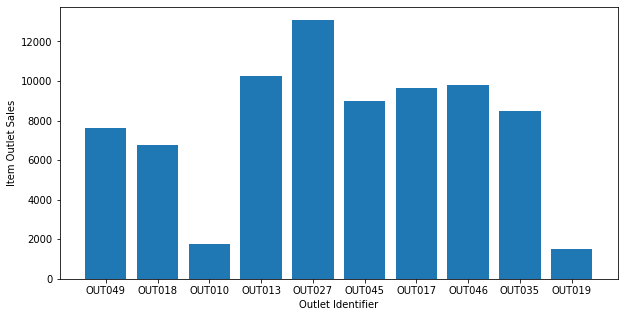

In [ ]:
from matplotlib import colorbar
#Inference- values having the most sales have visibillity less than 0.2
plt.subplots(figsize=(10,5))
plt.bar(data["Outlet_Identifier"],data["Item_Outlet_Sales"], width = 0.8)
plt.xlabel("Outlet Identifier")
plt.ylabel("Item Outlet Sales")


<div dir=rtl>
היקף מכירות של כל חנות. <br>
מן הגרף הניתן לראות שבחנות OUT27 יש את היקף המכירות הגדול ביותר

Text(0, 0.5, 'Item Outlet Sales')

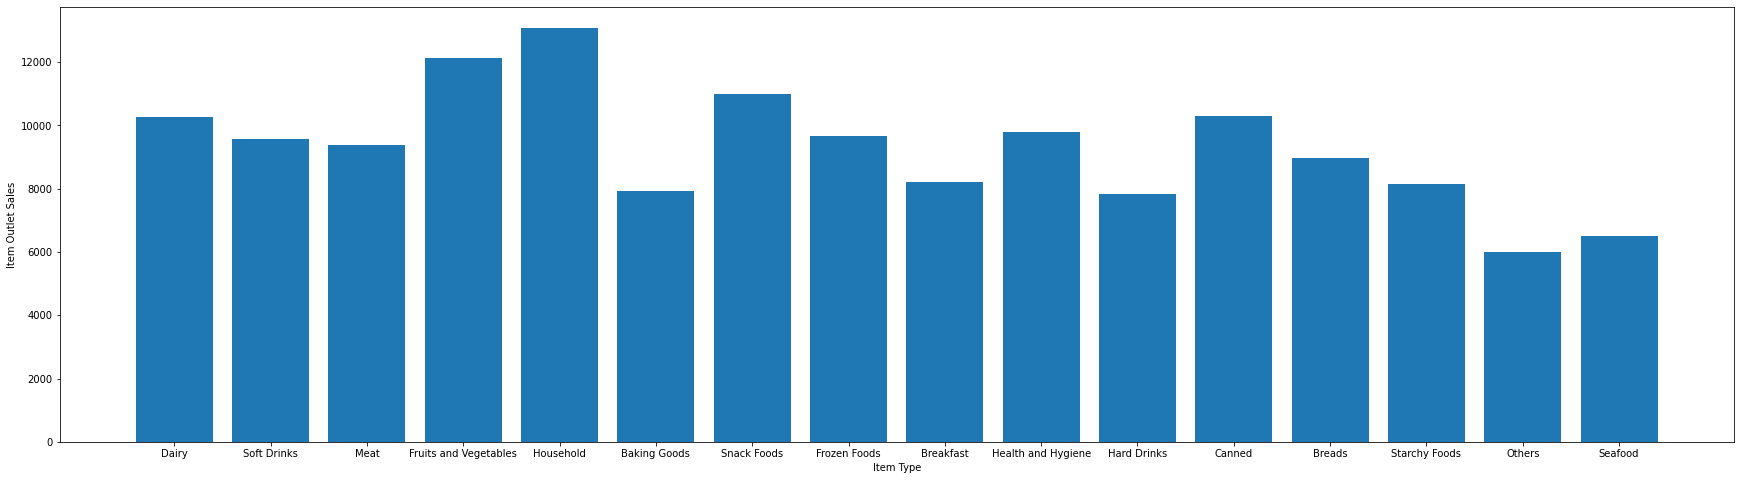

In [ ]:
fig, ax = plt.subplots(figsize=(30,8))
plt.bar(data["Item_Type"],data["Item_Outlet_Sales"], width = 0.8)
plt.xlabel("Item Type")
plt.ylabel("Item Outlet Sales")

<div dir=rtl>

השוואה בין סוג המוצרים להיקף המכירות.
 <br> ניתן לראות מן הגרף שמוצרי בית הם הרווחיים ביותר ברשת.



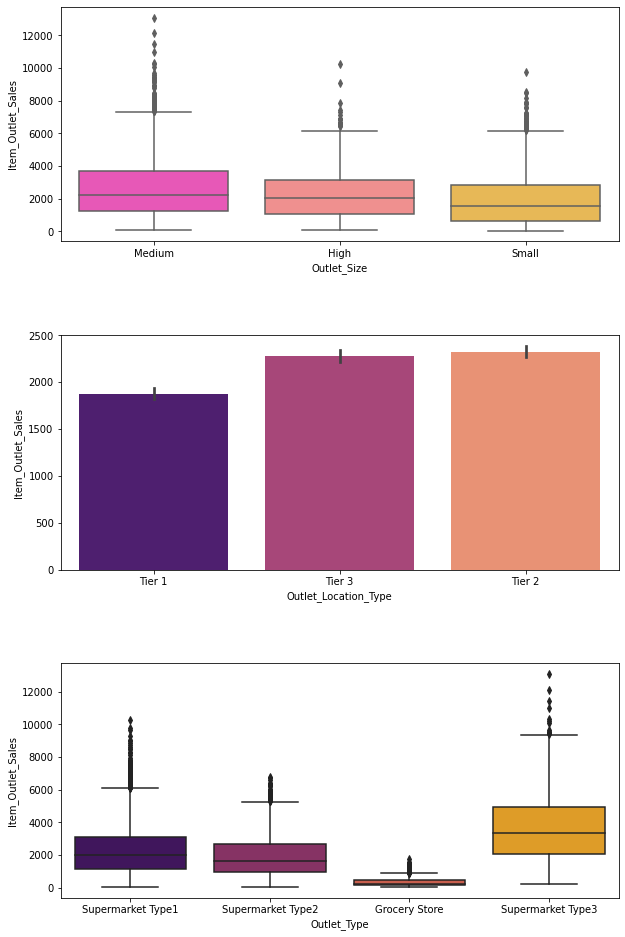

In [ ]:
plt.figure(figsize = (10,9))

plt.subplot(311)
sns.boxplot(x='Outlet_Size', y='Item_Outlet_Sales', data=data, palette="spring")

plt.subplot(312)
sns.barplot(x='Outlet_Location_Type',y='Item_Outlet_Sales',data=data,palette='magma')


plt.subplot(313)
sns.boxplot(x='Outlet_Type', y='Item_Outlet_Sales', data=data, palette="inferno")

plt.subplots_adjust(wspace = 0.2, hspace = 0.4,top = 1.5)

plt.show()

<div dir=rtl>
הגרפים האחרונים שהוצגו מתארים תכונות שמדברות על החנויות עצמן ועל אופי החנויות ביחס להיקף המכירות:<br><br>
1. מהגרף הראשון ניתן לראות שגודל החנות לא משמעותי במיוחד.למרות זאת -חנויות קטנות ישיגו שולי רווח נמוכים יותר. <br><br>
2. מהגרף השני ניתן לראות שהמיקום אכן משנה. במיקום Tier2 וTier3 יש היקף מכירות גדול יותר.<br><br>
3. מהגרף האחרון אנו רואים שלסופרמרקט מסוג 3 יש היקף מכירות הגדול ביותר. בהתאם לגרף הראשון, שבו ראינו שלחנויות קטנות יותר יש היקף מכירות קטן יותר. אנו רואים זאת בכך שלחנויות מסוג מכולת יש היקף מכירות נמוך ביחס לאחרים.

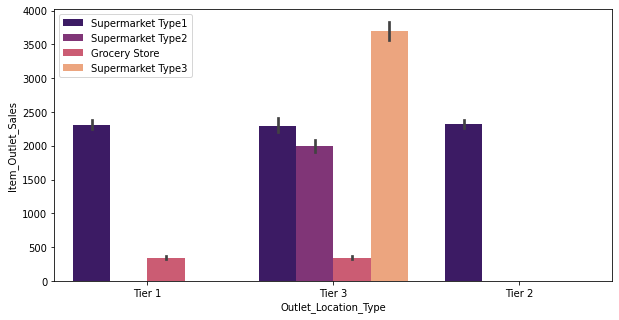

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot('Outlet_Location_Type','Item_Outlet_Sales',hue='Outlet_Type',data=data,palette='magma')
plt.legend()

<div dir=rtl>

במיקום Tier-3 נמצאים כל סוגי החנויות ומופיע בו גם היקף המכירות הגבוה ביותר.

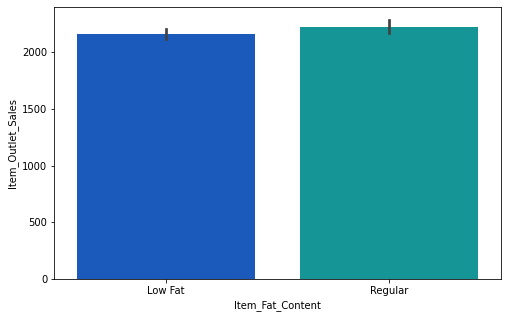

In [ ]:
plt.figure(figsize=(8,5))
sns.barplot('Item_Fat_Content','Item_Outlet_Sales',data=df,palette='winter')

<div dir=rtl>

אין הבדל גדול במכירות בין מוצרים בעלי אחוז שומן נמוך לשאר המוצרים. <br>
מן הראוי בגרף זה השתמשנו בדאטה המתוקן.

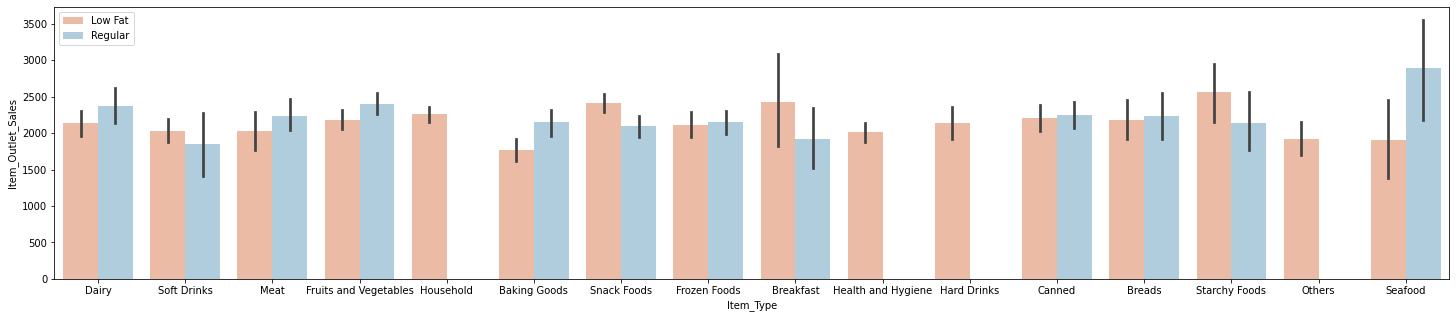

In [ ]:
plt.figure(figsize=(25,5))
sns.barplot('Item_Type','Item_Outlet_Sales',hue='Item_Fat_Content',data=df,palette='RdBu')
plt.legend()

<div dir=rtl>

הגרף מתאר אחוזי שומן בכל מוצר ביחס להיקף מכירות. <br>
לרוב רואים שלמוצרים הדלים בשומן יש היקף מכירות נמוך מעט אך ההבדלים לא משמעותיים.

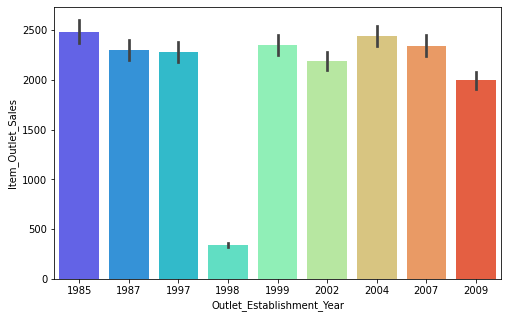

In [ ]:
plt.figure(figsize=(8,5))
sns.barplot(x='Outlet_Establishment_Year',y='Item_Outlet_Sales',data=data,palette='rainbow')

<div dir=rtl>

ניתן לראות היקף מכירות חריג בחנות שנוסדה ב1998. בשאר החנויות שנוסדו בתאריכים האחרים היקף המכירות דומה, מה שלא מצביע על עלייה או ירידה בהיקף המכירות בהתאמה לותק החנות. (הפוך מהמצופה - שחנויות מבוססות יותר וותיקות יותר ישיגו היקף מכירות גבוה יותר ולקוחות קבועים)

Text(0, 0.5, 'Item Outlet Sales')

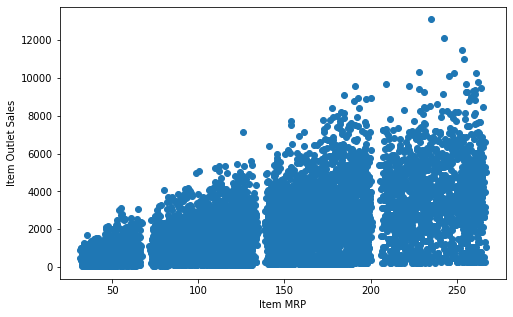

In [ ]:
plt.figure(figsize=(8,5))
plt.scatter(y='Item_Outlet_Sales',x='Item_MRP',data=data)
plt.xlabel('Item MRP')
plt.ylabel('Item Outlet Sales')

<div dir=rtl>
ניתן להסיק מגרף זה שהמוצרים שמתומחרים בסביבות 200-250 דולר הם בעלי היקף המכירות הגובה ביותר.

<div dir=rtl>

## מסקנות וסיכום האקספלורציה וההצגה הגרפית:
1. ניתן לראות שהחנות הרווחית ביותר היא OUT27.<br>
2. מוצרים הקשורים למשק בית ופירות וירקות הם הרווחיים ביותר.<br>
3. חנויות קטנות יותר פחות ריווחיות.<br>
4. המיקום משפיע על היקף המכירות, חנויות מסוג Teir2 וTeir3 ריווחיות יותר.<br>
5. ותק החנות (חנות ישנה או חדשה) לא משנה את היקף המכירות.<br>
6. מוצרים יקרים יותר הם בעלי היקף מכירות גבוהים יותר.<br>
7. מוצרים בעלי ויזואליות 0 יקבלו ערך ממוצע בהתאם להסברים שתוארו קודם לכן.
8. בעמודת Outlet_Size נציב ערך שכיחים. כיוון שחלק מהחנויות בעל אופי מסוים, לא מתואר הגודל שלהן.
9. ערכים חסרים בעמודת Item_Weight נמלא בממוצע כיוון שהערכים רציפים והמשקלים לא קיצוניים.

<div dir=rtl>

#   קידוד הערכים האלפא נומריים
 נקודד את הערכים כדי שנוכל לעבוד איתם במודלים השונים שנריץ. <br>
 הקידוד יתבצע בשיטת Label Encoder בה הערכים האפלא נומריים יקבלו ערכים מספרים שלמים.

In [ ]:
# #Label Encoder-> ldf-label data frame
ldf = df.copy()
lbl_encode = LabelEncoder()

ldf['Item_Fat_Content']=lbl_encode.fit_transform(ldf['Item_Fat_Content'])
ldf['Item_Type']=lbl_encode.fit_transform(ldf['Item_Type'])
ldf['Outlet_Size']=lbl_encode.fit_transform(ldf['Outlet_Size'])
ldf['Outlet_Type']=lbl_encode.fit_transform(ldf['Outlet_Type'])
ldf['Item_Identifier']=lbl_encode.fit_transform(ldf['Item_Identifier'])
ldf['Outlet_Identifier']=lbl_encode.fit_transform(ldf['Outlet_Identifier'])
ldf['Outlet_Location_Type']=df['Outlet_Location_Type']


<div dir=rtl>

קידוד בשיטת לייבל אינקודר את הערכים האלפא נומריים.<br>


<div dir=rtl>

#השוואה בין מודלי חיזוי שונים וביצוע הפעולות הבאות:
<br>
1. חלוקת הדאטה לשלושה, אימון, ולידציה, ומבחן.<br>
2. מציאת ההייפרפרמטרים המיטביים באמצעות פונקציות נבחרות (רצוי).<br>
3. אימון המודל, קבלת רמת דיוק ובדיקה שלא קיים overfitting (בדיקת Score של אימון וולידציה) <br>
4. בדיקת RMSE. <br><br>
האינדיקציה הטובה ביותר לקבלת החלטה באיזה מודל להשתמש הוא RMSE.<br>
RMSE(root mean square error)- גודל השגיאה הממוצע של המודל לחזות ערך מסוים.

<div dir=rtl>

## XGBOOST Regression

In [ ]:
x_XGBR= ldf.drop(columns='Item_Outlet_Sales', axis=1)
y_XGBR= ldf.Item_Outlet_Sales

x_train_XGBR, x_val_XGBR, y_train_XGBR, y_val_XGBR = train_test_split(x_XGBR, y_XGBR,test_size=0.3)
x_val_XGBR,x_test_XGBR,y_val_XGBR,y_test_XGBR = train_test_split(x_val_XGBR, y_val_XGBR,test_size=0.5)

print(f'x_train: {x_train_XGBR.shape}')
print(f'x_val: {x_val_XGBR.shape}')
print(f'x_test: {x_test_XGBR.shape}')
print(f'y_train: {y_train_XGBR.shape}')
print(f'y_val: {y_val_XGBR.shape}')
print(f'y_test: {y_test_XGBR.shape}')

x_train: (5966, 11)
x_val: (1278, 11)
x_test: (1279, 11)
y_train: (5966,)
y_val: (1278,)
y_test: (1279,)


In [ ]:
params = { 'max_depth': [3, 5, 6, 10, 15, 20],
           'learning_rate': [0.01, 0.1, 0.2, 0.3],
           'subsample': np.arange(0.5, 1.0, 0.1),
           'colsample_bytree': np.arange(0.4, 1.0, 0.1),
           'colsample_bylevel': np.arange(0.4, 1.0, 0.1),
           'n_estimators': [100, 500, 1000]}
xgbr =XGBRegressor(seed = 20)
clf = RandomizedSearchCV(estimator=xgbr,
                         param_distributions=params,
                         scoring='neg_mean_squared_error',
                         n_iter=25,
                         verbose=1)
clf.fit(x_train_XGBR, y_train_XGBR)
print("Best parameters:", clf.best_params_)
print("Lowest RMSE: ", (-clf.best_score_)**(1/2.0))

<div dir=rtl>

מציאת ההיפרפרמטרים הטובים ביותר בעבור המודל.<br>

In [ ]:
XGBR = XGBRegressor(subsample=0.6,n_estimators=100,max_depth=3,learning_rate=0.1,colsample_bytree=0.7999999999999999,colsample_bylevel=0.7999999999999999)
XGBR.fit(x_train_XGBR, y_train_XGBR)


print("XGBoost Regressor Train score: ",XGBR.score(x_train_XGBR, y_train_XGBR))
print("XGBoost Regressor Validtion score: ",XGBR.score(x_val_XGBR, y_val_XGBR))

[17:10:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
XGBoost Regressor Train score:  0.6356051918903802
XGBoost Regressor Validtion score:  0.590106798011321


<div dir=rtl>

הפעלת מודל חיזוי XGBoost. <br>
כאן לקחנו את הערכים שפונקציית מציאת ההיפרפרמטרים הטובים ביותר מצאה, חשוב להבהיר שבכל הרצה הפונקציית תוציא היפרפרמטרים מעט שונים.

In [ ]:
y_pred_XGBR = XGBR.predict(x_val_XGBR)
MSE_XGBR = metrics.mean_squared_error(y_val_XGBR, y_pred_XGBR)
rmse_XGBR = np.sqrt(MSE_XGBR)
print("XGBoost Regressor RMSE: ",rmse_XGBR)

XGBoost Regressor RMSE:  1086.2593860874651


<div dir=rtl>

## Random Forest Regressoin

In [ ]:
x_rfr= ldf.drop(columns='Item_Outlet_Sales', axis=1)
y_rfr= ldf.Item_Outlet_Sales

x_train_rfr, x_val_rfr, y_train_rfr, y_val_rfr = train_test_split(x_rfr, y_rfr,test_size=0.3)
x_val_rfr,x_test_rfr,y_val_rfr,y_test_rfr = train_test_split(x_val_rfr, y_val_rfr,test_size=0.5)

print(f'x_train: {x_train_rfr.shape}')
print(f'x_val: {x_val_rfr.shape}')
print(f'x_test: {x_test_rfr.shape}')
print(f'y_train: {y_train_rfr.shape}')
print(f'y_val: {y_val_rfr.shape}')
print(f'y_test: {y_test_rfr.shape}')

x_train: (5966, 11)
x_val: (1278, 11)
x_test: (1279, 11)
y_train: (5966,)
y_val: (1278,)
y_test: (1279,)


In [ ]:
from sklearn.model_selection import RandomizedSearchCV# Number of trees in random forest
random_grid = {
                'n_estimators': [10, 20, 40, 50, 100, 150, 200, 500],
                'max_features': ['auto', 'sqrt'],
                'max_depth': [3, 5, 7, 9, 11, 15],
                'bootstrap': [True, False]
                }
rfr = RandomForestRegressor()
rfr_random = RandomizedSearchCV(estimator = rfr, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
rfr_random.fit(x_train_rfr, y_train_rfr.ravel())


Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [3, 5, 7, 9, 11, 15],
                                        'max_features': ['auto', 'sqrt'],
                                        'n_estimators': [10, 20, 40, 50, 100,
                                                         150, 200, 500]},
                   random_state=42, verbose=2)

In [ ]:
y_pred_rfr = rfr_random.predict(x_val_rfr)
MSE_rfr = metrics.mean_squared_error(y_val_rfr, y_pred_rfr)
rmse_rfr = np.sqrt(MSE_rfr)

print("Random Forest Regressor RMSE: ",rmse_rfr)

Random Forest Regressor RMSE:  1059.999804970605


<div dir=rtl>

הקוד בודק את הייפרפרמטרים הטובים ביותר עבור המודל RandomForest ומאמן את המודל בהתאם לערכים הטובים ביותר שהוא מצא.

In [ ]:
print("Random Forest Regressor Train score: ",rfr_random.score(x_train_rfr, y_train_rfr))
print("Random Forest Regressor Validtion score: ",rfr_random.score(x_val_rfr, y_val_rfr))

Random Forest Regressor Train score:  0.613517119952776
Random Forest Regressor Validtion score:  0.6007506201467715


In [ ]:
y_pred_rfr = rfr_random.predict(x_val_rfr)
MSE_rfr = metrics.mean_squared_error(y_val_rfr, y_pred_rfr)
rmse_rfr = np.sqrt(MSE_rfr)

print("Random Forest Regressor RMSE: ",rmse_rfr)

Random Forest Regressor RMSE:  1059.999804970605


<div dir=rtl>

## Linear Regression

In [ ]:
x_LR= ldf.drop(columns='Item_Outlet_Sales', axis=1)
y_LR= ldf.Item_Outlet_Sales

x_train_LR, x_val_LR, y_train_LR, y_val_LR = train_test_split(x_LR, y_LR,test_size=0.3)
x_val_LR,x_test_LR,y_val_LR,y_test_LR = train_test_split(x_val_LR, y_val_LR,test_size=0.5)

print(f'x_train: {x_train_LR.shape}')
print(f'x_val: {x_val_LR.shape}')
print(f'x_test: {x_test_LR.shape}')
print(f'y_train: {y_train_LR.shape}')
print(f'y_val: {y_val_LR.shape}')
print(f'y_test: {y_test_LR.shape}')

x_train: (5966, 11)
x_val: (1278, 11)
x_test: (1279, 11)
y_train: (5966,)
y_val: (1278,)
y_test: (1279,)


In [ ]:
lr = LinearRegression()
lr.fit(x_train_LR,y_train_LR)
print("Linear Regressor Train score: ",lr.score(x_train_LR, y_train_LR))
print("Linear Regressor Validtion score: ",lr.score(x_val_LR, y_val_LR))

Linear Regressor Train score:  0.5044512337216678
Linear Regressor Validtion score:  0.5207892533422093


In [ ]:
y_pred_LR = lr.predict(x_val_LR)
MSE_LR = metrics.mean_squared_error(y_val_LR, y_pred_LR)
rmse_LR = np.sqrt(MSE_LR)
print("Linear Regressor RMSE: ",rmse_LR)

Linear Regressor RMSE:  1203.4505986510217


<div dir=rtl>

## Lasso Regresssion

In [ ]:
x_lasso= ldf.drop(columns='Item_Outlet_Sales', axis=1)
y_lasso= ldf.Item_Outlet_Sales

x_train_lasso, x_val_lasso, y_train_lasso, y_val_lasso = train_test_split(x_lasso, y_lasso,test_size=0.3)
x_val_lasso,x_test_lasso,y_val_lasso,y_test_lasso = train_test_split(x_val_lasso, y_val_lasso,test_size=0.5)

print(f'x_train: {x_train_lasso.shape}')
print(f'x_val: {x_val_lasso.shape}')
print(f'x_test: {x_test_lasso.shape}')
print(f'y_train: {y_train_lasso.shape}')
print(f'y_val: {y_val_lasso.shape}')
print(f'y_test: {y_test_lasso.shape}')

x_train: (5966, 11)
x_val: (1278, 11)
x_test: (1279, 11)
y_train: (5966,)
y_val: (1278,)
y_test: (1279,)


In [ ]:
lasso = Lasso()
lasso.fit(x_train_lasso,y_train_lasso)
print("Lasso Regressor Train score: ",lasso.score(x_train_lasso, y_train_lasso))
print("Lasso Regressor Validtion score: ",lasso.score(x_val_lasso, y_val_lasso))

Lasso Regressor Train score:  0.502354026394207
Lasso Regressor Validtion score:  0.5082453133343715


In [ ]:
y_pred_lasso = lr.predict(x_val_lasso)
MSE_lasso = metrics.mean_squared_error(y_val_lasso, y_pred_lasso)
rmse_lasso = np.sqrt(MSE_lasso)
print("Lasso Regressor RMSE: ",rmse_lasso)

Lasso Regressor RMSE:  1170.7791434966944


<div dir=rtl>

# השוואה בין המודלים

In [ ]:
rmse_list=[rmse_XGBR, rmse_rfr, rmse_LR, rmse_lasso]
model_names=['XGBoost Regression','Random Forest Regression','Linear Regression', 'Lasso Regression']
evaluation = pd.DataFrame({'Model': model_names, 'RMSE': rmse_list})

In [ ]:
evaluation

,Model,RMSE
0,XGBoost Regression,1086.259386
1,Random Forest Regression,1059.999805
2,Linear Regression,1203.450599
3,Lasso Regression,1170.779143


<div dir=rtl>

כל הרצה ה RMSE היה שונה מעט. <br>
XGBOOST Regressor וRandomForest Regressor הציגו ביצועים טובים יותר.<br><br>

לאחר כ-10 ריצות הסקנו כי הRMSE של RandomForest Regressor היה הנמוך ביותר ברוב המקרים לכן בחרנו להמשיך עם מודל זה.


<div dir=rtl>

# בניית DataFrame שיכיל את הערכים הנחזים והמרה לקובץ CSV


<div dir=rtl>

בשלב זה החלטנו על המודל שנחזה להיות הטוב ביותר - בעל אחוז השגיאה הריבועית הקטנה ביותר. <br> <br>
אנחנו בחרנו במודל של -   Random Forest Regressor <br>
כעת ניצור דאטאפריים חדש עם ערכי ה- test של המודל  ולאחר מכן נייצא את התוצאות לאקסל.

In [ ]:
x_i_list=x_test_rfr.index.tolist() #x test

<div dir=rtl>
ראשית ניצור רשימה של כל האינדקסים הרלוונטיים שהמודל הוציא עבור המבחן.

In [ ]:
y_pred_final =rfr_random.predict(x_test_rfr)

<div dir=rtl>
 נוציא את הערכים שהמודל חזה למשתנה חדש.

In [ ]:
data_output = pd.DataFrame(columns=['Item_Identifier','Outlet_Identifier','Item_Outlet_Sales'])
data_output = data_output.append(df.loc[x_i_list,['Item_Identifier','Outlet_Identifier']])
data_output.Item_Outlet_Sales=y_pred_final #y predicted tests

data_output # the new dataframe we've created

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
993,NCM31,OUT017,2192.844324
5848,FDE24,OUT045,2192.844324
8160,NCP17,OUT027,1714.206889
92,DRI25,OUT045,836.401571
5335,FDV28,OUT017,686.649767
...,...,...,...
3400,FDE11,OUT035,3080.692549
5106,FDY33,OUT019,363.722338
1309,FDX16,OUT013,2413.061627
5277,FDD57,OUT035,1574.987070


<div dir=rtl>

בשורת קוד העליונה אנו בונים דאטאפריים שיכיל את המוצרים השונים בחנויות אותו הם ימכרו.<br>
בעמודה האחרונה  (Item_Outlet_Sales) אנחנו נראה את התחזית של המודל שלנו. <br>
את הדאטאפריים הזה בהמשך נייצא לקובץ אקסל ונאפס את האינדקסים בשביל האסטטיקה.

In [ ]:
data_comparison = pd.DataFrame(columns=['Item_Identifier','Outlet_Identifier','Predicted_Outlet', 'Original_Outlet'])
data_comparison.Item_Identifier = data_output.Item_Identifier
data_comparison.Outlet_Identifier = data_output.Outlet_Identifier
data_comparison.Predicted_Outlet = data_output.Item_Outlet_Sales
data_comparison.Original_Outlet =y_test_rfr

data_comparison

,Item_Identifier,Outlet_Identifier,Predicted_Outlet,Original_Outlet
993,NCM31,OUT017,2192.844324,2836.3080
5848,FDE24,OUT045,2192.844324,427.4436
8160,NCP17,OUT027,1714.206889,1661.8368
92,DRI25,OUT045,836.401571,1381.5350
5335,FDV28,OUT017,686.649767,339.5580
...,...,...,...,...
3400,FDE11,OUT035,3080.692549,7033.5112
5106,FDY33,OUT019,363.722338,159.1262
1309,FDX16,OUT013,2413.061627,2546.6850
5277,FDD57,OUT035,1574.987070,1332.9316


<div dir=rtl>
כאן בנינו דאטאפריים שיראה לנו ויזואלית את היקף המכירות שהמודל חזה אל מול ההיקף המכירות מהדאטא המקורי.
<br>
כמו שניתן לראות המודל היה קרוב ברוב המקומות. השגיאה הריבועית המקסימלית הממוצעת היא כ- *1050 דולר (RMSE)

<br><br><br><br>
 *חשוב לציין כי בכל ריצה הRMSE מעט שונה.

In [ ]:
from pathlib import Path  
data_output = data_output.reset_index(drop=True) 

filepath = Path('Best_Model_Output.csv')  
filepath.parent.mkdir(parents=True, exist_ok=True)  
data_output.to_csv(filepath)  

<div dir=rtl>

data_output.reset_index- פונקצייה שמסדרת מחדש את סדר האינדקסים שמשכנו מסט הנתונים המקורי.<br>

הפונקציה השנייה מייצאת את הDataframe לקובץ CSV